#Importing libraries ⏬

In [64]:
import pandas as pd
import sklearn
import numpy as np
import matplotlib.pyplot as plt


In [65]:
# @title Importing Dataset ⏬
#Daily data
daily_data=pd.read_csv('daily_data.csv')
# daily_data.head()
#Hourly data
hourly_data=pd.read_csv('hourly_data.csv')
# hourly_data.head()
monthly_data=pd.read_csv('monthly_data.csv')
# monthly_data.head()
three_hour_data=pd.read_csv('three_hour_data.csv')
# three_hour_data.head()

<ipython-input-65-bf6cbd166f9a>:6: DtypeWarning: Columns (11,12) have mixed types. Specify dtype option on import or set low_memory=False.
  hourly_data=pd.read_csv('hourly_data.csv')


In [66]:
# @title DataPreprocessing ⛏♻
import pandas as pd
def filter(dataset):
  print(dataset.isna().sum())
  dataset.fillna(method='ffill', inplace=True)  # Forward fill for simplicity to fill the null values
  # Convert date column to datetime object
  dataset['DATE'] = pd.to_datetime(dataset['DATE'])
  dataset.set_index('DATE', inplace=True)
  print("Converted data column to datetime pandas object")
filter(hourly_data)
filter(daily_data)
filter(monthly_data)
filter(three_hour_data)

STATION                      0
DATE                         0
REPORT_TYPE                  0
SOURCE                       0
BackupElements               0
BackupElevation              0
BackupEquipment              0
BackupLatitude               0
BackupLongitude              0
BackupName                   0
HourlyAltimeterSetting       0
HourlyDewPointTemperature    0
HourlyDryBulbTemperature     0
HourlyPrecipitation          0
HourlyRelativeHumidity       0
HourlySeaLevelPressure       0
HourlyStationPressure        0
HourlyVisibility             0
HourlyWetBulbTemperature     0
HourlyWindDirection          0
HourlyWindSpeed              0
WindEquipmentChangeDate      0
dtype: int64


<ipython-input-66-91f9c9020920>:4: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  dataset.fillna(method='ffill', inplace=True)  # Forward fill for simplicity to fill the null values


Converted data column to datetime pandas object
STATION                                       0
DATE                                          0
REPORT_TYPE                                   0
SOURCE                                        0
BackupElements                                0
BackupElevation                               0
BackupEquipment                               0
BackupLatitude                                0
BackupLongitude                               0
BackupName                                    0
DailyAverageDewPointTemperature               0
DailyAverageDryBulbTemperature                0
DailyAverageRelativeHumidity                  0
DailyAverageSeaLevelPressure                  0
DailyAverageStationPressure                   0
DailyAverageWetBulbTemperature                0
DailyAverageWindSpeed                         0
DailyCoolingDegreeDays                        0
DailyDepartureFromNormalAverageTemperature    0
DailyHeatingDegreeDays                  

<ipython-input-66-91f9c9020920>:4: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  dataset.fillna(method='ffill', inplace=True)  # Forward fill for simplicity to fill the null values
<ipython-input-66-91f9c9020920>:4: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  dataset.fillna(method='ffill', inplace=True)  # Forward fill for simplicity to fill the null values
<ipython-input-66-91f9c9020920>:4: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  dataset.fillna(method='ffill', inplace=True)  # Forward fill for simplicity to fill the null values


In [68]:
# @title 1) daily data preprocessing
daily_data=daily_data.replace('s',pd.NA)
daily_data=daily_data.replace('T',pd.NA)
daily_data=daily_data[daily_data['DailyPeakWindDirection']!='VRB']
print(daily_data.isna().sum())
daily_data=daily_data.dropna()
daily_data.isna().sum()

STATION                                         0
REPORT_TYPE                                     0
SOURCE                                          0
BackupElements                                  0
BackupElevation                                 0
BackupEquipment                                 0
BackupLatitude                                  0
BackupLongitude                                 0
BackupName                                      0
DailyAverageDewPointTemperature                 0
DailyAverageDryBulbTemperature                  0
DailyAverageRelativeHumidity                    0
DailyAverageSeaLevelPressure                    0
DailyAverageStationPressure                     0
DailyAverageWetBulbTemperature                  0
DailyAverageWindSpeed                           0
DailyCoolingDegreeDays                          0
DailyDepartureFromNormalAverageTemperature      0
DailyHeatingDegreeDays                          0
DailyMaximumDryBulbTemperature                  0


,0
STATION,0
REPORT_TYPE,0
SOURCE,0
BackupElements,0
BackupElevation,0
BackupEquipment,0
BackupLatitude,0
BackupLongitude,0
BackupName,0
DailyAverageDewPointTemperature,0


In [69]:
# @title 2) hourly data preprocessing
hourly_data=hourly_data.replace('s',pd.NA)
hourly_data=hourly_data.replace('T',pd.NA)
hourly_data=hourly_data[hourly_data['HourlyWindDirection']!='VRB']
print(hourly_data.isna().sum())
hourly_data=hourly_data.dropna()
hourly_data.isna().sum()

STATION                         0
REPORT_TYPE                     0
SOURCE                          0
BackupElements                  0
BackupElevation                 0
BackupEquipment                 0
BackupLatitude                  0
BackupLongitude                 0
BackupName                      0
HourlyAltimeterSetting          0
HourlyDewPointTemperature       0
HourlyDryBulbTemperature        0
HourlyPrecipitation          6945
HourlyRelativeHumidity          0
HourlySeaLevelPressure          0
HourlyStationPressure           0
HourlyVisibility                0
HourlyWetBulbTemperature        0
HourlyWindDirection             0
HourlyWindSpeed                 0
WindEquipmentChangeDate         0
dtype: int64


,0
STATION,0
REPORT_TYPE,0
SOURCE,0
BackupElements,0
BackupElevation,0
BackupEquipment,0
BackupLatitude,0
BackupLongitude,0
BackupName,0
HourlyAltimeterSetting,0


In [70]:
# @title 3) three hour data preprocessing
three_hour_data=three_hour_data.replace('s',pd.NA)
three_hour_data=three_hour_data.replace('T',pd.NA)

three_hour_data=three_hour_data[three_hour_data['HourlyWindDirection']!='VRB']
print(three_hour_data.isna().sum())
three_hour_data=three_hour_data.dropna()
three_hour_data.isna().sum()

STATION                      0
REPORT_TYPE                  0
SOURCE                       0
BackupElements               0
BackupElevation              0
BackupEquipment              0
BackupLatitude               0
BackupLongitude              0
BackupName                   0
HourlyDewPointTemperature    0
HourlyDryBulbTemperature     0
HourlyPressureChange         0
HourlyPressureTendency       0
HourlyRelativeHumidity       0
HourlySeaLevelPressure       0
HourlyStationPressure        0
HourlyVisibility             0
HourlyWetBulbTemperature     0
HourlyWindDirection          0
HourlyWindSpeed              0
WindEquipmentChangeDate      0
dtype: int64


,0
STATION,0
REPORT_TYPE,0
SOURCE,0
BackupElements,0
BackupElevation,0
BackupEquipment,0
BackupLatitude,0
BackupLongitude,0
BackupName,0
HourlyDewPointTemperature,0


In [71]:
daily_data_obj=daily_data.select_dtypes(include=['object']).columns.tolist()
# daily_data_obj
daily_data=daily_data.drop(columns=daily_data_obj)

In [79]:
hourly_data_obj=hourly_data.select_dtypes(include=['object']).columns.tolist()
# hourly_data_obj
hourly_data=hourly_data.drop(columns=hourly_data_obj)

In [80]:
monthly_data_obj=monthly_data.select_dtypes(include=['object']).columns.tolist()
# monthly_data_obj
monthly_data=monthly_data.drop(columns=monthly_data_obj)

In [81]:
three_hour_data_obj=three_hour_data.select_dtypes(include=['object']).columns.tolist()
# three_hour_data_obj
three_hour_data=three_hour_data.drop(columns=three_hour_data_obj)

# Analysing the patterns 📊

In [93]:
from statsmodels.tsa.seasonal import seasonal_decompose
import seaborn as sns
def analyse_patterns(dataset,hist_parameter:str,time_series_parameter:str,seasonal_parameter:str):
  print(dataset.describe())
  sns.histplot(dataset[hist_parameter])
  plt.show()
  correlation_matrix = daily_data.corr()
  sns.heatmap(correlation_matrix)
  plt.show()
  # Time series visualization
  plt.plot(dataset.index, dataset[time_series_parameter])
  plt.xlabel('Date')
  plt.ylabel('Daily Average Dry Bulb Temperature')
  plt.title('Temperature Trend Over Time')
  plt.show()
  dataset.index = pd.to_datetime(dataset.index)
  dataset = dataset.asfreq('D')  # 'D' for daily frequency

  dataset.fillna(method='ffill', inplace=True)
  # Seasonal decomposition
  result = seasonal_decompose(dataset[seasonal_parameter], model='additive')
  result.plot()
  plt.show()


            STATION  SOURCE  BackupElevation  BackupLatitude  BackupLongitude  \
count  2.708000e+03  2708.0           2708.0     2708.000000      2708.000000   
mean   7.251801e+10     6.0            260.0       42.689780       -73.828310   
std    0.000000e+00     0.0              0.0        0.004164         0.005731   
min    7.251801e+10     6.0            260.0       42.681200       -73.831090   
25%    7.251801e+10     6.0            260.0       42.691800       -73.831090   
50%    7.251801e+10     6.0            260.0       42.691800       -73.831090   
75%    7.251801e+10     6.0            260.0       42.691800       -73.831090   
max    7.251801e+10     6.0            260.0       42.691800       -73.816500   

       DailyAverageDewPointTemperature  DailyAverageDryBulbTemperature  \
count                      2708.000000                     2708.000000   
mean                         38.612629                       50.015879   
std                          18.716506          

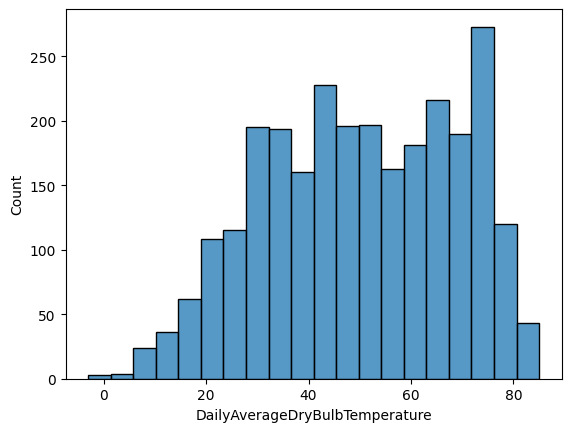

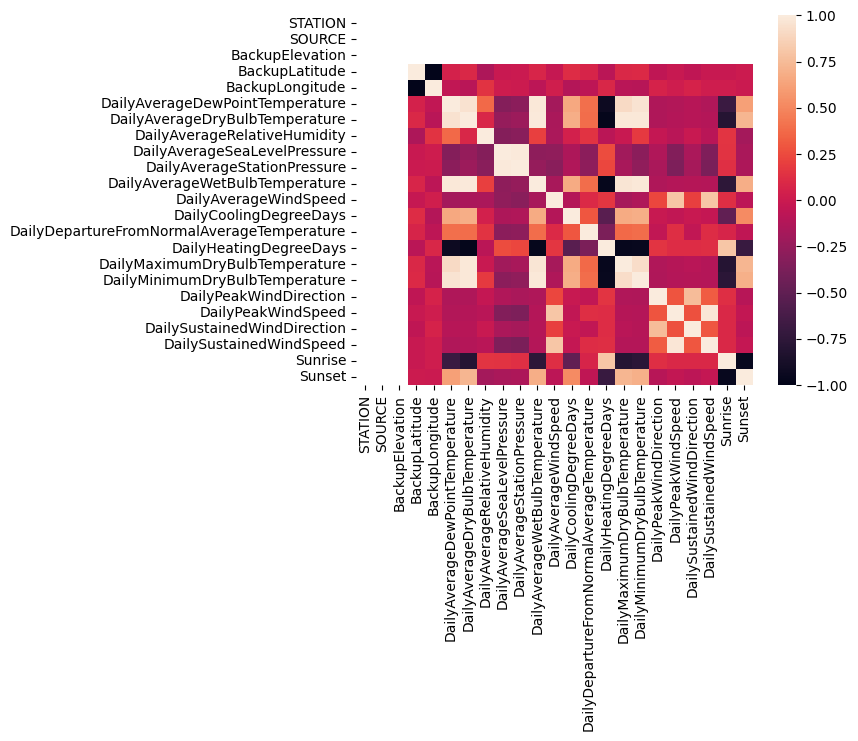

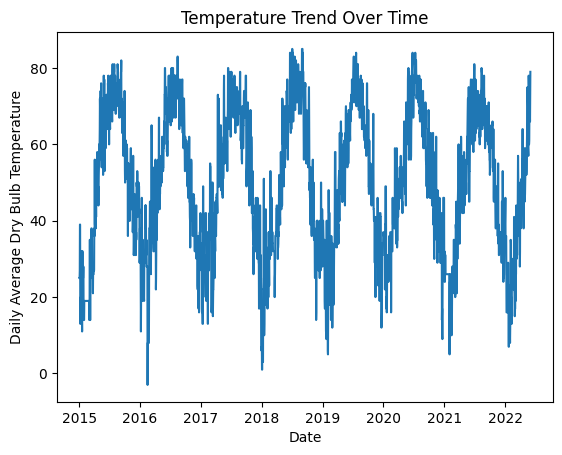

<ipython-input-93-6fd69d65db5d>:19: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  dataset.fillna(method='ffill', inplace=True)


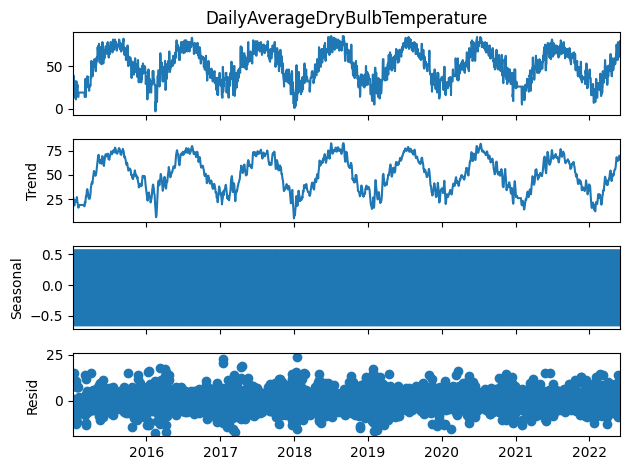

In [94]:
# @title Daily data

analyse_patterns(daily_data,'DailyAverageDryBulbTemperature','DailyAverageDryBulbTemperature','DailyAverageDryBulbTemperature')

            STATION        SOURCE  BackupElevation  BackupLatitude  \
count  5.576300e+04  55763.000000          55763.0    55763.000000   
mean   7.251801e+10      6.994387            260.0       42.689761   
std    0.000000e+00      0.074710              0.0        0.004178   
min    7.251801e+10      6.000000            260.0       42.681200   
25%    7.251801e+10      7.000000            260.0       42.691800   
50%    7.251801e+10      7.000000            260.0       42.691800   
75%    7.251801e+10      7.000000            260.0       42.691800   
max    7.251801e+10      7.000000            260.0       42.691800   

       BackupLongitude  HourlyRelativeHumidity  HourlyVisibility  \
count     55763.000000            55763.000000      55763.000000   
mean        -73.828283               65.833115          9.381308   
std           0.005751               18.515015          2.032401   
min         -73.831090                8.000000          0.000000   
25%         -73.831090       

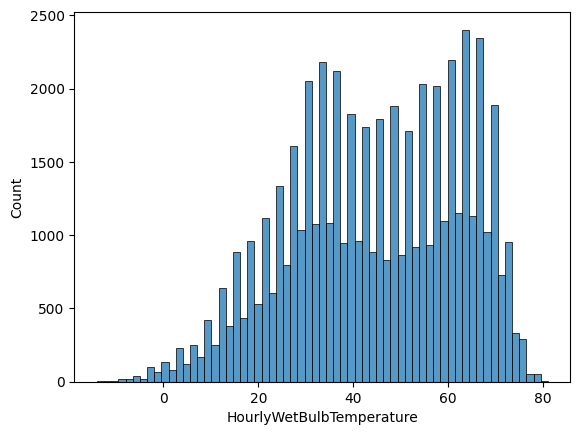

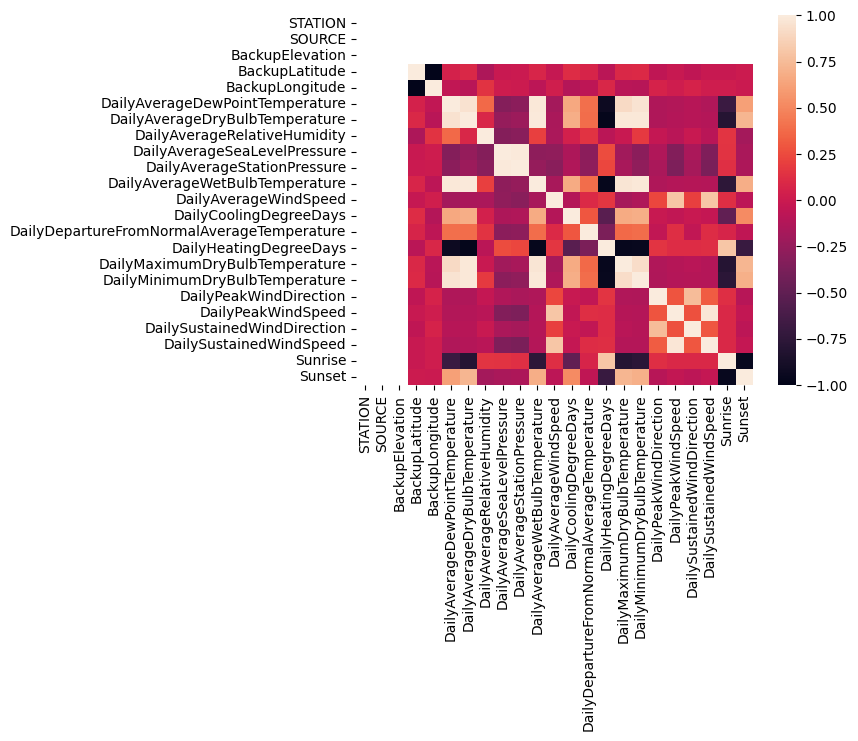

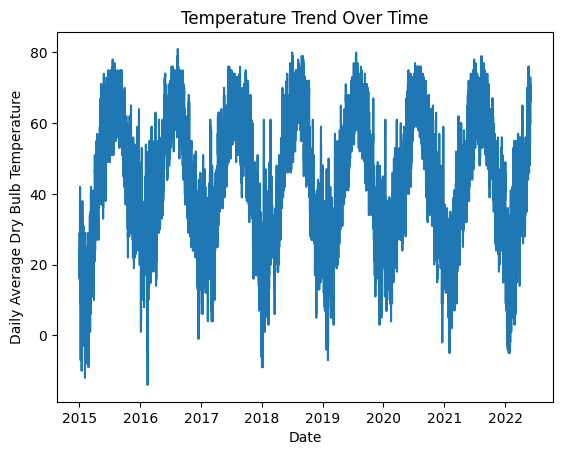

<ipython-input-93-6fd69d65db5d>:19: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  dataset.fillna(method='ffill', inplace=True)


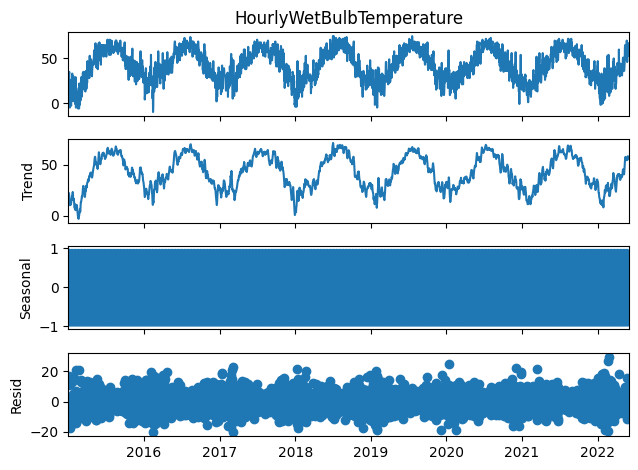

In [95]:
# @title hourly data
analyse_patterns(hourly_data,'HourlyWetBulbTemperature','HourlyWetBulbTemperature','HourlyWetBulbTemperature')

            STATION  SOURCE       AWND  BackupElevation  BackupLatitude  \
count  8.700000e+01    87.0  87.000000             87.0       87.000000   
mean   7.251801e+10     6.0   7.596552            260.0       42.689729   
std    0.000000e+00     0.0   1.458930              0.0        0.004227   
min    7.251801e+10     6.0   4.700000            260.0       42.681200   
25%    7.251801e+10     6.0   6.500000            260.0       42.691800   
50%    7.251801e+10     6.0   7.400000            260.0       42.691800   
75%    7.251801e+10     6.0   8.700000            260.0       42.691800   
max    7.251801e+10     6.0  10.700000            260.0       42.691800   

       BackupLongitude         CDSD        CLDD       DSNW         HDSD  ...  \
count        87.000000    87.000000   87.000000  87.000000    87.000000  ...   
mean        -73.828239   362.954023   60.252874   1.149425  3129.402299  ...   
std           0.005819   367.436180   92.905706   1.660266  2504.767930  ...   
min 

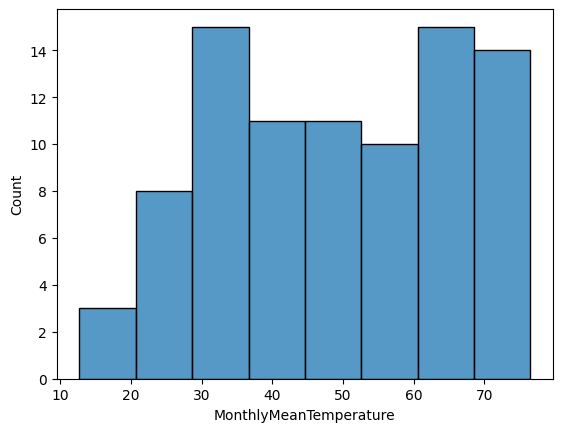

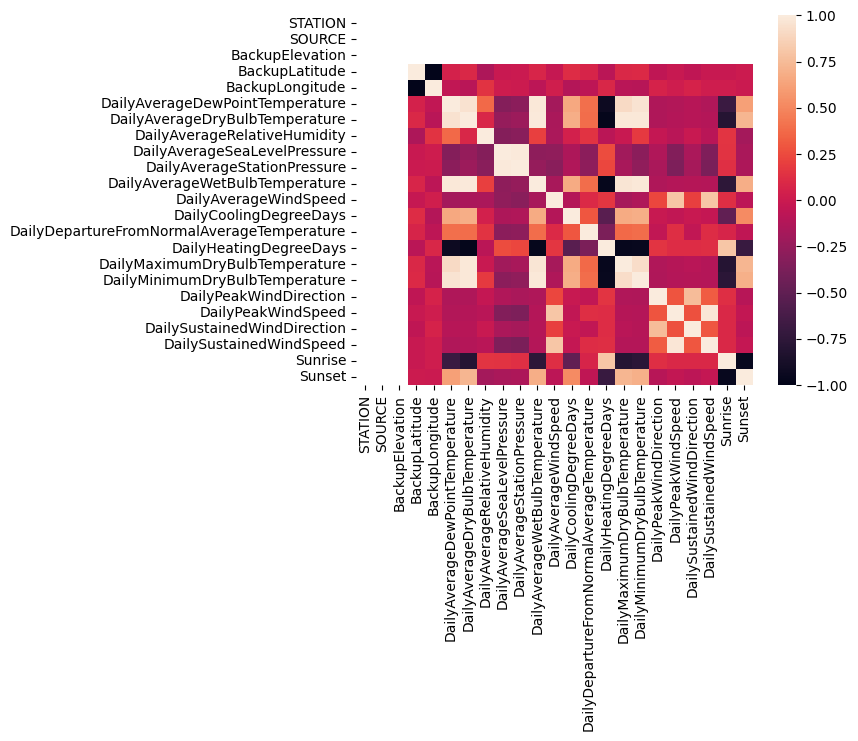

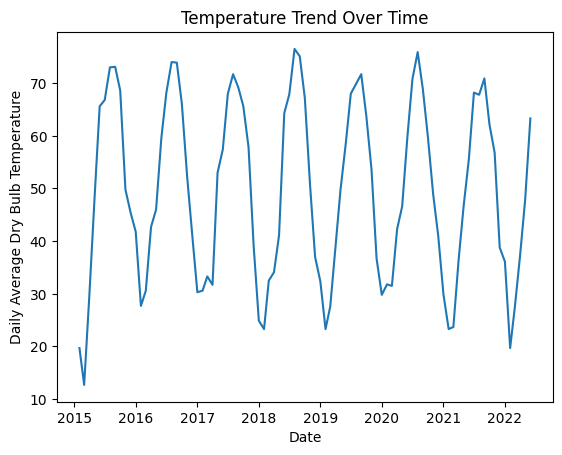

<ipython-input-93-6fd69d65db5d>:19: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  dataset.fillna(method='ffill', inplace=True)


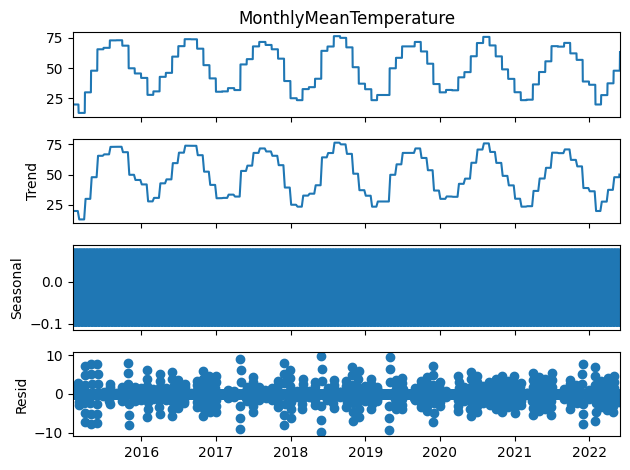

In [96]:
# @title monthly data
analyse_patterns(monthly_data,'MonthlyMeanTemperature','MonthlyMeanTemperature','MonthlyMeanTemperature')


            STATION   SOURCE  BackupElevation  BackupLatitude  \
count  2.084300e+04  20843.0          20843.0    20843.000000   
mean   7.251801e+10      4.0            260.0       42.689777   
std    0.000000e+00      0.0              0.0        0.004166   
min    7.251801e+10      4.0            260.0       42.681200   
25%    7.251801e+10      4.0            260.0       42.691800   
50%    7.251801e+10      4.0            260.0       42.691800   
75%    7.251801e+10      4.0            260.0       42.691800   
max    7.251801e+10      4.0            260.0       42.691800   

       BackupLongitude  HourlyPressureChange  HourlyPressureTendency  \
count     20843.000000          20843.000000            20843.000000   
mean        -73.828305              0.001490                4.907835   
std           0.005734              0.049271                2.762154   
min         -73.831090             -0.320000                1.000000   
25%         -73.831090             -0.030000          

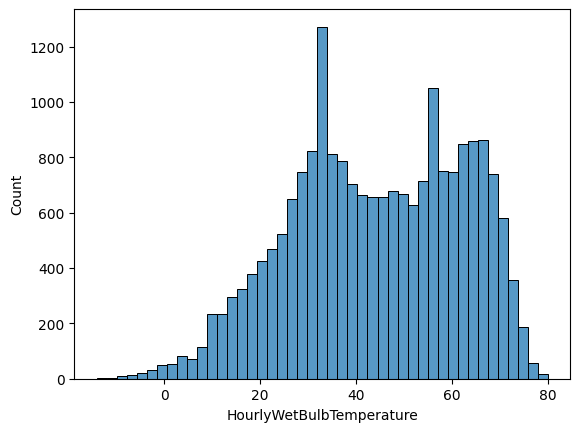

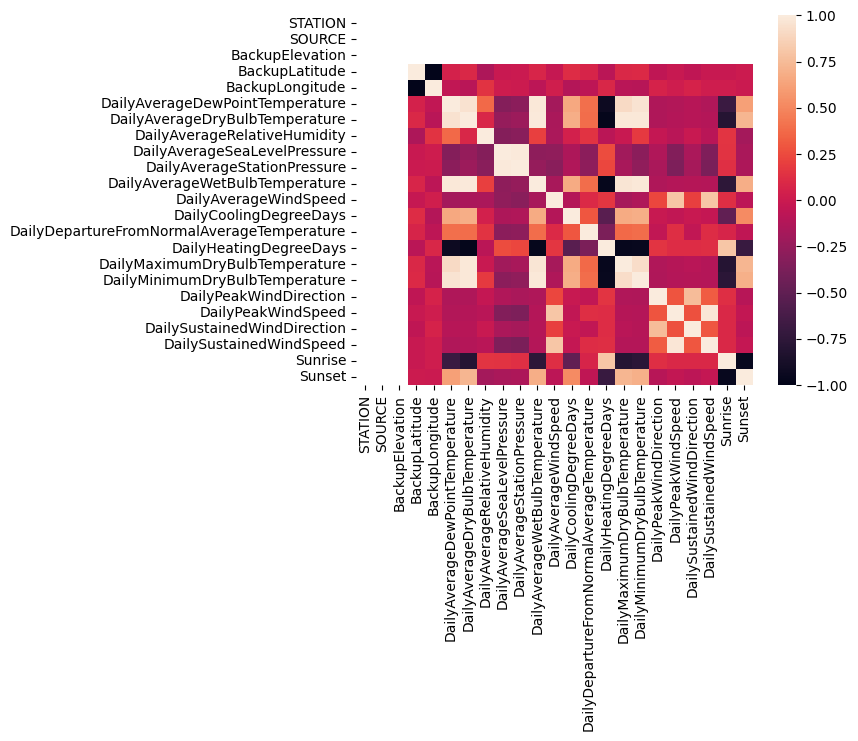

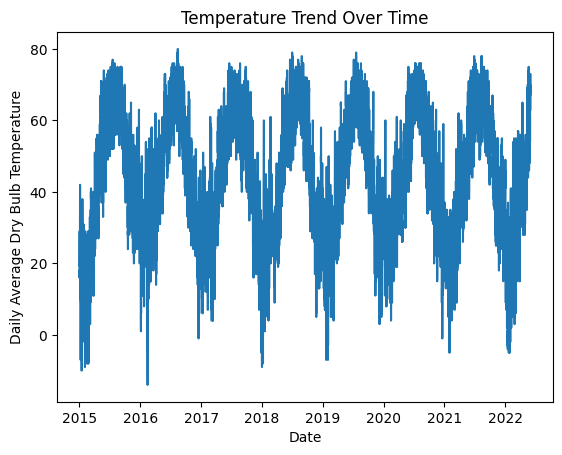

<ipython-input-93-6fd69d65db5d>:19: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  dataset.fillna(method='ffill', inplace=True)


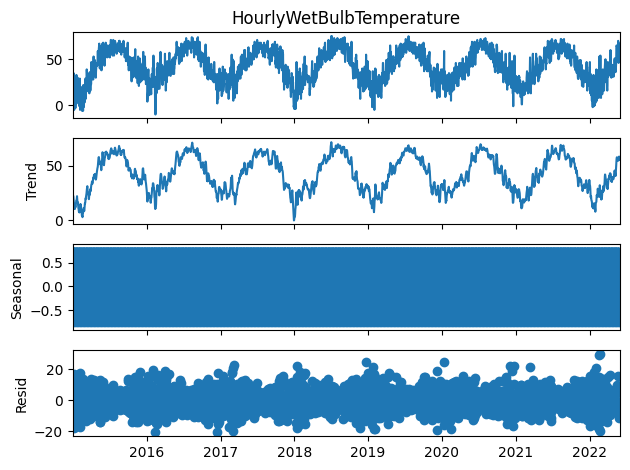

In [97]:
# @title three hour data
analyse_patterns(three_hour_data,'HourlyWetBulbTemperature','HourlyWetBulbTemperature','HourlyWetBulbTemperature')
